In [9]:
from utils.data_handling import *
from utils.sensor_optimisation_gpy_sparse import *
from parameters import *
import GPy

import matplotlib.pyplot as plt
np.random.seed(101)


In [10]:
parameters['i_end'] = 100
parameters['crop']
parameters


{'i_start': 0,
 'i_end': 100,
 'crop': ((-10, 10), (-10, 10), (0, 50)),
 'field_name': 'TracerBackground',
 'cov_method': 'sample'}

In [11]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0
==> Cropping vtu files to ((-10, 10), (-10, 10), (0, 50))
Number of Locations after cropping :  1129
==> Loading from : ../data/temp_data/cache_0_100_((-10, 10), (-10, 10), (0, 50))/loc_TracerBackground.pkl
==> Loading from : ../data/temp_data/cache_0_100_((-10, 10), (-10, 10), (0, 50))/time_TracerBackground.pkl
==> Loading from : ../data/temp_data/cache_0_100_((-10, 10), (-10, 10), (0, 50))/data_TracerBackground.pkl


In [12]:
# Data for the regression
dim = 3
t = 100
X = loc_df.values #[I,:dim]
Y = data_df.values[:,t].reshape(-1,1) # [I,t].reshape(-1,1)
Y.shape

(1129, 1)

In [13]:
kernel = GPy.kern.Matern52(dim,ARD=False) + GPy.kern.White(dim)
model_gp = GPy.models.SparseGPRegression(X,Y,kernel,num_inducing=500)

{'inducing': <matplotlib.collections.PathCollection at 0x7f54e8c34278>}

 /home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


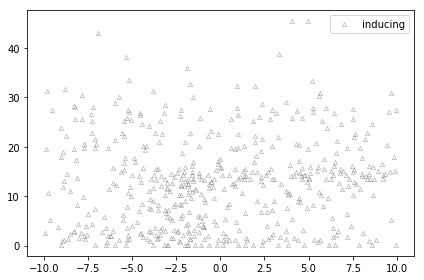

In [14]:
model_gp.plot_inducing(visible_dims=[0,2])

In [15]:
model_gp.optimize(messages=True,max_iters = 100000)


{'inducing': <matplotlib.collections.PathCollection at 0x7f54e8bb2198>}

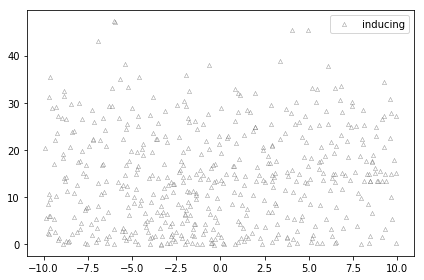

In [16]:
model_gp.plot_inducing(visible_dims=[0,2])

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f54e8b1e0b8>]}

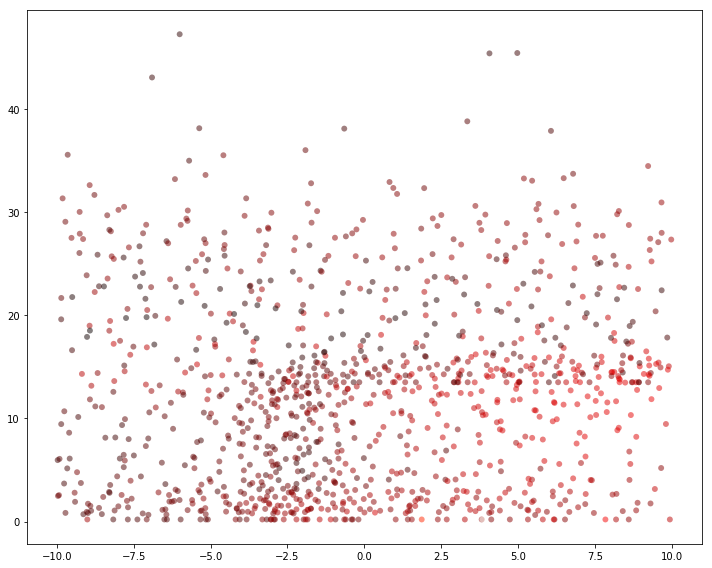

In [17]:
model_gp.plot_data(visible_dims=[0,2],figsize=(10,8))

 /home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'gpmean': [<matplotlib.contour.QuadContourSet at 0x7f54e8afcf60>]}

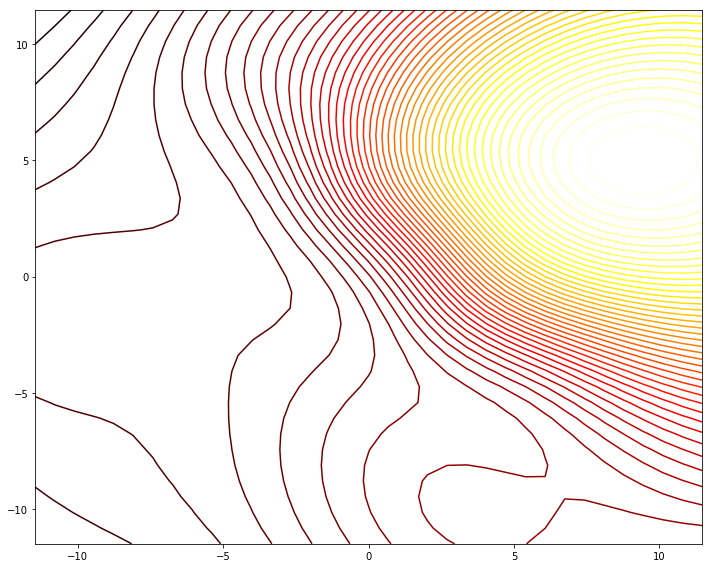

In [18]:
model_gp.plot_mean(visible_dims=[0,1],figsize=(10,8),levels=50)

## Sensor Optimisation

Define the Sets for the optimisation

In [19]:
n_V = X.shape[0]
sets = define_sets(n_V)

Number of sensors to place : 

In [20]:
k = 10

### Lazy Sensor Optimisation

In [21]:
sensor_loc_optimisation_lazy(k, sets, X, Y, model_gp)

array([ 800,  187, 1008,  561,  497,  147,  104, 1045,  396, 1049])

### Naive Sensor Optimisation

In [10]:
k = 10
sensor_loc_optimisation_naive(k, sets, X, Y, kernel)

100%|██████████| 10/10 [01:26<00:00,  8.70s/it]


array([106,  66,  35, 181,  44,  89,  59,  72,  18,  83])

In [59]:
model_gp.

array([[0.22818728, 0.22504217, 0.22406441, ..., 0.11730768, 0.14382212,
        0.14871364],
       [0.22504217, 0.22818728, 0.2240326 , ..., 0.12347474, 0.15545225,
        0.15949175],
       [0.22406441, 0.2240326 , 0.22818728, ..., 0.12721812, 0.1543072 ,
        0.1626914 ],
       ...,
       [0.11730768, 0.12347474, 0.12721812, ..., 0.22818728, 0.20727911,
        0.20613906],
       [0.14382212, 0.15545225, 0.1543072 , ..., 0.20727911, 0.22818728,
        0.22313871],
       [0.14871364, 0.15949175, 0.1626914 , ..., 0.20613906, 0.22313871,
        0.22818728]])